# Assignment 3:

Create a model to perform binary classification between horse and
human images using convolutional neural networks. Dataset available in Tensorflow datasets



In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D
from tensorflow.keras.layers import Activation,Dropout,Flatten
from tensorflow.keras import backend as k

In [6]:
#converting all image into same size
img_width,img_height = 300,300

In [7]:
train_data_dir = "horse-or-human/train"
val_data_dir = "horse-or-human/validation"

In [28]:
#we will train 400 data
n_train = 1027
# testing 100 data
n_val = 256
epochs = 10
#breaking the data into different batches and training each batch seperately
batch_size = 136

In [29]:
# Input CNN layer
model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(300, 300, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#1st hidden CNN layer
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd hidden CNN layer
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#3rd hidden CNN layer
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#4th hidden CNN layer
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


# output needs to be flattened
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 activation_21 (Activation)  (None, 298, 298, 16)      0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 activation_22 (Activation)  (None, 147, 147, 32)      0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                 

In [31]:
model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics = ['accuracy'])

In [32]:
# now feed data to the model
#to get data from external folder, we use image data generator

train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

In [34]:
# Train data
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width,img_height),
        batch_size = batch_size,
        class_mode='binary'
    )

Found 1027 images belonging to 2 classes.


In [36]:
#Test data
val_generator = val_datagen.flow_from_directory(
        val_data_dir,
        target_size=(img_width,img_height),
        batch_size = batch_size,
        class_mode ='binary'
    )

Found 256 images belonging to 2 classes.


In [37]:
# since the images are comming through generator so we need to specify the generator and its parameters
model.fit_generator(
    train_generator,
    steps_per_epoch=n_train // batch_size,
    epochs = epochs,
    validation_data = val_generator,
    validation_steps = n_val // batch_size
    )

C:\Users\Ananaya Gupta\AppData\Local\Temp\ipykernel_7440\2100583445.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/10
7/7 [==============================] - 58s 8s/step - loss: 31.2723 - accuracy: 0.4961 - val_loss: 6.2342 - val_accuracy: 0.5441
Epoch 2/10
7/7 [==============================] - 55s 8s/step - loss: 1.5699 - accuracy: 0.6004 - val_loss: 0.6175 - val_accuracy: 0.6103
Epoch 3/10
7/7 [==============================] - 62s 9s/step - loss: 0.4565 - accuracy: 0.7879 - val_loss: 0.3925 - val_accuracy: 0.8456
Epoch 4/10
7/7 [==============================] - 71s 11s/step - loss: 0.2514 - accuracy: 0.8923 - val_loss: 0.9905 - val_accuracy: 0.8382
Epoch 5/10
7/7 [==============================] - 63s 9s/step - loss: 0.1533 - accuracy: 0.9394 - val_loss: 0.5307 - val_accuracy: 0.8603
Epoch 6/10
7/7 [==============================] - 63s 9s/step - loss: 0.1101 - accuracy: 0.9652 - val_loss: 1.5767 - val_accuracy: 0.8088
Epoch 7/10
7/7 [==============================] - 62s 9s/step - loss: 0.0641 - accuracy: 0.9776 - val_loss: 1.4750 - val_accuracy: 0.8456
Epoch 8/10
7/7 [================

In [46]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [58]:
import cv2
import matplotlib.pyplot as plt

### Testing with 3rd image:

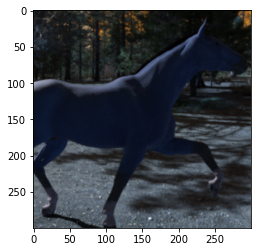

In [86]:
test_img = cv2.imread('horse-or-human/train/horses/horse10-5.png')
plt.imshow(test_img)
test_img = cv2.resize(test_img,(300, 300))
test_input = test_img.reshape((1,300, 300,3))

In [87]:
classes = model.predict(test_input)
if classes[0]>0.5:
    print("It is a Human Image")
else:
    print("It is a Horse image")

1/1 [==============================] - 0s 42ms/step
It is a Horse image


### Testing with 2nd image:

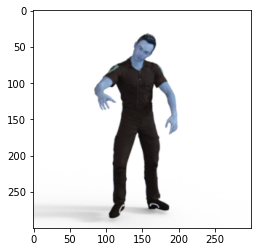

In [76]:

test_img = cv2.imread('horse-or-human/validation/humans/valhuman01-08.png')
plt.imshow(test_img)
test_img = cv2.resize(test_img,(300, 300))
test_input = test_img.reshape((1,300, 300,3))

In [77]:
classes = model.predict(test_input)
if classes[0]>0.5:
    print("It is a Human Image")
else:
    print("It is a Horse Image")

1/1 [==============================] - 0s 49ms/step
It is a Human Image


### Testing with 3rd image: 

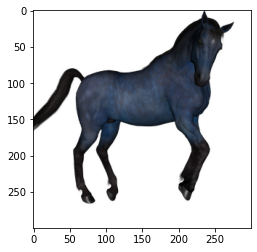

In [84]:
test_img = cv2.imread('horse-or-human/validation/horses/horse1-241.png')
plt.imshow(test_img)
test_img = cv2.resize(test_img,(300, 300))
test_input = test_img.reshape((1,300, 300,3))

In [85]:
classes = model.predict(test_input)
if classes[0]>0.5:
    print("It is a Human Image")
else:
    print("It is a Horse Image")

1/1 [==============================] - 0s 49ms/step
It is a Horse Image
